In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_set')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [3]:
max(df['Pregnancies'])

17

In [4]:
x = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [5]:
x.shape

(768, 8)

In [6]:
y.shape

(768,)

In [7]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42, stratify=df['Outcome'])

In [12]:
model = LogisticRegression()

In [13]:
model.fit(x_train, y_train)

d:\St Anns\AI\pandas\Diabetes\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_train_predicted = model.predict(x_train)

In [15]:
y_test_predicted = model.predict(x_test)

In [16]:
classificationreport_train = classification_report(y_train, y_train_predicted)
print(classificationreport_train)

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       400
           1       0.75      0.57      0.65       214

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614



In [17]:
cm = confusion_matrix(y_train, y_train_predicted)
print(cm)

[[359  41]
 [ 91 123]]


Text(50.722222222222214, 0.5, 'Actual')

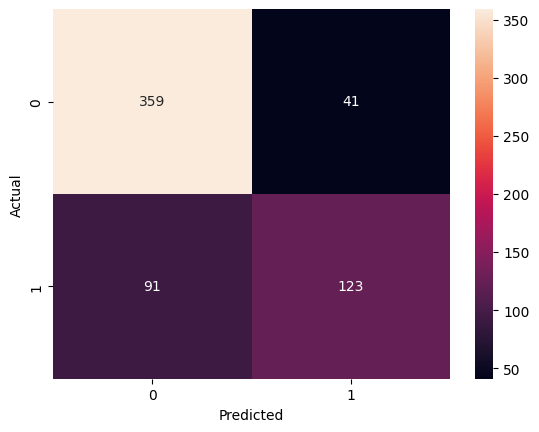

In [18]:
sns.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [19]:
cm_test = confusion_matrix(y_test, y_test_predicted)
print(cm_test)

[[82 18]
 [28 26]]


              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154



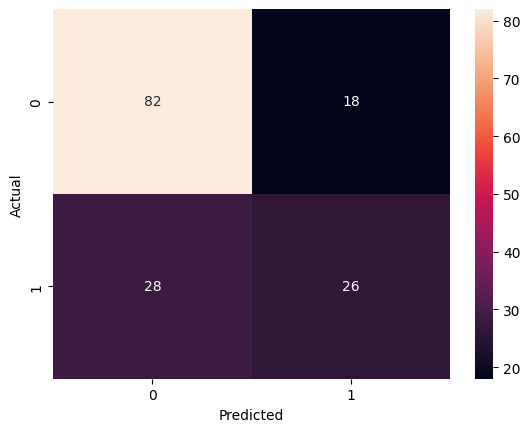

In [20]:
sns.heatmap(cm_test, annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
classificationreport_test = classification_report(y_test, y_test_predicted)
print(classificationreport_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_train_dectree = dectree.predict(x_train)

In [23]:
y_test_dectree = dectree.predict(x_test)

In [24]:
classification_train_dectree = classification_report(y_train, y_train_dectree)
print(classification_train_dectree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [25]:
classification_test_dectree = classification_report(y_test, y_test_dectree)
print(classification_test_dectree)

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       100
           1       0.47      0.46      0.47        54

    accuracy                           0.63       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.63      0.63      0.63       154



In [26]:
cm_train_dectree = confusion_matrix(y_train, y_train_dectree)
print(cm_train_dectree)
cm_test_dectree = confusion_matrix(y_test, y_test_dectree)
print(cm_test_dectree)

[[400   0]
 [  0 214]]
[[72 28]
 [29 25]]


Text(50.722222222222214, 0.5, 'Actual')

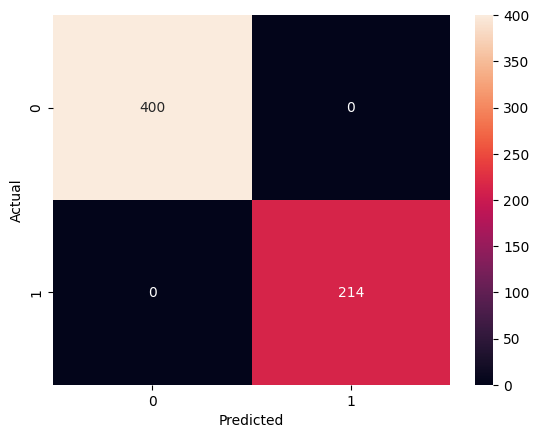

In [27]:
sns.heatmap(cm_train_dectree, annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

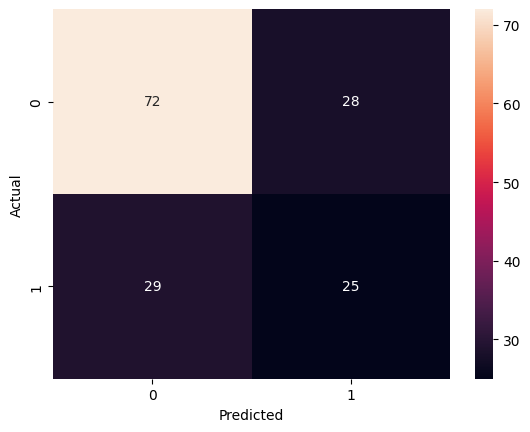

In [28]:
sns.heatmap(cm_test_dectree, annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
recall_score(y_test, y_test_dectree)

0.46296296296296297

In [30]:
recall_score(y_train, y_train_dectree)

1.0

In [31]:
dic_tree_new = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 27, random_state = 42)
dic_tree_new.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,27
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
y_train_dic = dic_tree_new.predict(x_train)
y_test_dic = dic_tree_new.predict(x_test)

In [33]:
classification_train_dic = classification_report(y_train, y_train_dic)
print(classification_train_dic)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       400
           1       0.83      0.71      0.76       214

    accuracy                           0.85       614
   macro avg       0.84      0.82      0.83       614
weighted avg       0.85      0.85      0.84       614



In [34]:
recall_score(y_train, y_train_dic)

0.7102803738317757

In [35]:
classification_test_dic = classification_report(y_test, y_test_dic)
print(classification_test_dic)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [36]:
recall_score(y_test, y_test_dic)

0.5370370370370371

In [37]:
cm_train_dic = confusion_matrix(y_train, y_train_dic)
cm_test_dic = confusion_matrix(y_test, y_test_dic)

Text(50.722222222222214, 0.5, 'Actual')

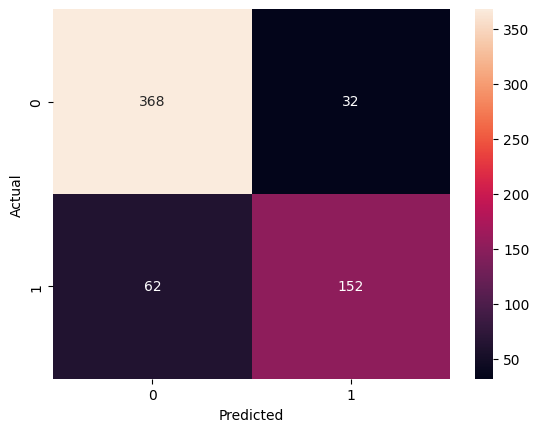

In [38]:
sns.heatmap(cm_train_dic, annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

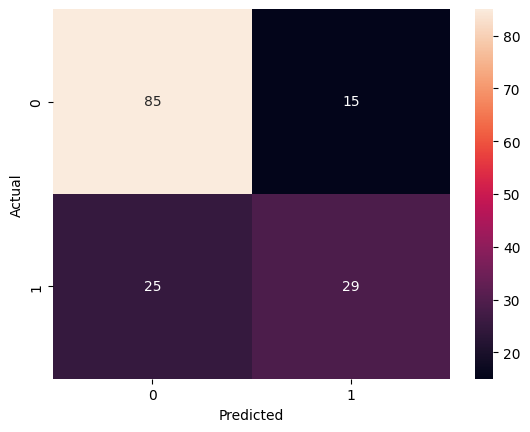

In [39]:
sns.heatmap(cm_test_dic, annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

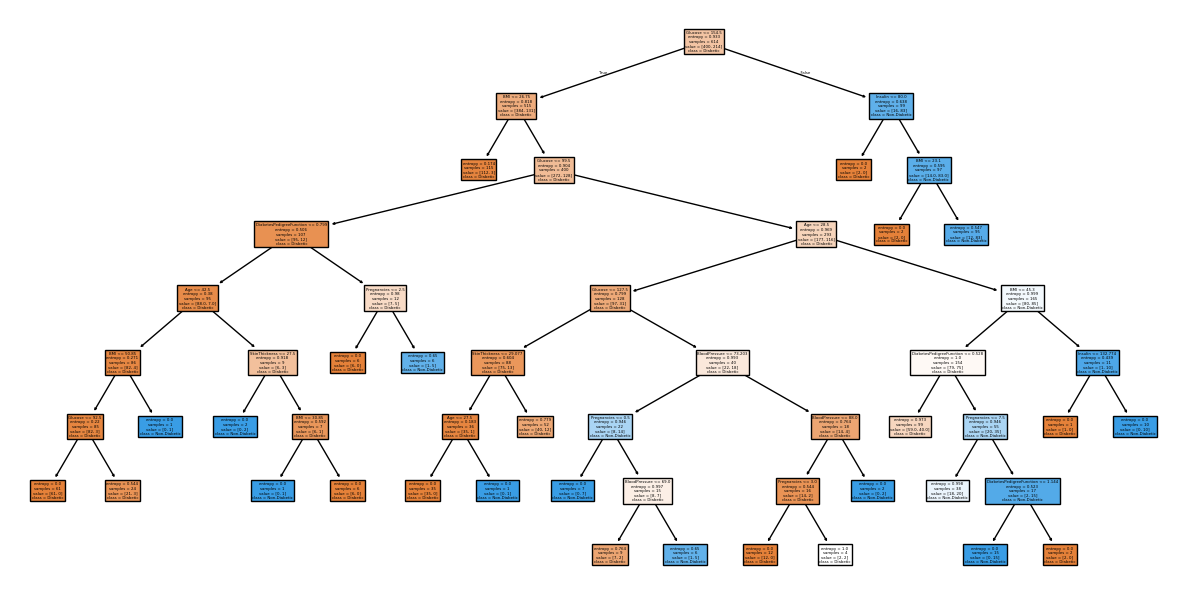

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 7.5))
plot_tree(dic_tree_new, filled=True, class_names=['Diabetic', 'Non-Diabetic'], feature_names=x_train.columns)
plt.show()

In [41]:
def evaluation_metrics(y_true, y_pred):
    """
    Prints common evaluation metrics for classification models.
    
    Parameters:
    y_true : Actual labels
    y_pred : Predicted labels
    """

    print("🔍 EVALUATION METRICS")
    print("----------------------------")
    
    print("Accuracy       :", accuracy_score(y_true, y_pred))
    print("Precision      :", precision_score(y_true, y_pred, average='weighted'))
    print("Recall         :", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score       :", f1_score(y_true, y_pred, average='weighted'))
    
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [42]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

grid = GridSearchCV(dt, param_grid, cv = 5, scoring = 'recall')
grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
Best Score: 0.5933554817275747


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
ranfor = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)
ranfor.fit(x_train, y_train)

,n_estimators,11
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_train_ranfor = ranfor.predict(x_train)
y_test_ranfor = ranfor.predict(x_test)

In [46]:
evaluation_metrics(y_train, y_train_ranfor)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.988599348534202
Precision      : 0.9886810270832215
Recall         : 0.988599348534202
F1 Score       : 0.9885673745473003

Confusion Matrix:
 [[399   1]
 [  6 208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       400
           1       1.00      0.97      0.98       214

    accuracy                           0.99       614
   macro avg       0.99      0.98      0.99       614
weighted avg       0.99      0.99      0.99       614



In [47]:
evaluation_metrics(y_test, y_test_ranfor)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7142857142857143
Precision      : 0.7064642282033586
Recall         : 0.7142857142857143
F1 Score       : 0.7083516483516483

Confusion Matrix:
 [[82 18]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [50]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.3]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring='recall')
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.6263565891472868


In [51]:
random_new = RandomForestClassifier(n_estimators=50, max_depth=15, max_features='log2', min_samples_leaf=1, min_samples_split=2, criterion='entropy', random_state=42)
random_new.fit(x_train, y_train)

,n_estimators,50
,criterion,'entropy'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_train_random = random_new.predict(x_train)
y_test_random = random_new.predict(x_test)

In [53]:
evaluation_metrics(y_train, y_train_random)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 1.0
Precision      : 1.0
Recall         : 1.0
F1 Score       : 1.0

Confusion Matrix:
 [[400   0]
 [  0 214]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



In [54]:
evaluation_metrics(y_test, y_test_random)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7337662337662337
Precision      : 0.7263910401525081
Recall         : 0.7337662337662337
F1 Score       : 0.7273970049089666

Confusion Matrix:
 [[84 16]
 [25 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=23, metric='minkowski')
knn.fit(x_train, y_train)

,n_neighbors,23
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
y_train_knn = knn.predict(x_train)
y_test_knn = knn.predict(x_test)

In [58]:
evaluation_metrics(y_train, y_train_knn)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7719869706840391
Precision      : 0.7666288233727214
Recall         : 0.7719869706840391
F1 Score       : 0.7660483901028706

Confusion Matrix:
 [[349  51]
 [ 89 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       400
           1       0.71      0.58      0.64       214

    accuracy                           0.77       614
   macro avg       0.75      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614



In [59]:
evaluation_metrics(y_test, y_test_knn)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7142857142857143
Precision      : 0.7080525606469003
Recall         : 0.7142857142857143
F1 Score       : 0.7100432405972097

Confusion Matrix:
 [[81 19]
 [25 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79       100
           1       0.60      0.54      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154



In [60]:
from sklearn.svm import SVC

In [61]:
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [62]:
y_train_svclinear = svc_linear.predict(x_train)
y_test_svclinear = svc_linear.predict(x_test)

In [63]:
evaluation_metrics(y_train, y_train_svclinear)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7899022801302932
Precision      : 0.7868688637570219
Recall         : 0.7899022801302932
F1 Score       : 0.7815824432640499

Confusion Matrix:
 [[362  38]
 [ 91 123]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       400
           1       0.76      0.57      0.66       214

    accuracy                           0.79       614
   macro avg       0.78      0.74      0.75       614
weighted avg       0.79      0.79      0.78       614



In [64]:
evaluation_metrics(y_test, y_test_svclinear)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7077922077922078
Precision      : 0.698891933754319
Recall         : 0.7077922077922078
F1 Score       : 0.7008015907537438

Confusion Matrix:
 [[82 18]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [65]:
recall_linear = recall_score(y_test, y_test_svclinear)

In [66]:
# kernel = poly
svc_poly=SVC(kernel = 'poly')
svc_poly.fit(x_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [67]:
y_train_poly = svc_poly.predict(x_train)
y_test_poly = svc_poly.predict(x_test)

In [68]:
evaluation_metrics(y_train, y_train_poly)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7866449511400652
Precision      : 0.7865805038765352
Recall         : 0.7866449511400652
F1 Score       : 0.7746118388165142

Confusion Matrix:
 [[369  31]
 [100 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       400
           1       0.79      0.53      0.64       214

    accuracy                           0.79       614
   macro avg       0.79      0.73      0.74       614
weighted avg       0.79      0.79      0.77       614



In [69]:
evaluation_metrics(y_test, y_test_poly)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7207792207792207
Precision      : 0.711387785767951
Recall         : 0.7207792207792207
F1 Score       : 0.700346306837179

Confusion Matrix:
 [[89 11]
 [32 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       100
           1       0.67      0.41      0.51        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



In [70]:
recall_poly = recall_score(y_test, y_test_poly)

In [71]:
# kernel = poly
svc_sigmoid=SVC(kernel = 'sigmoid')
svc_sigmoid.fit(x_train, y_train)

,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [72]:
y_train_sigmoid = svc_sigmoid.predict(x_train)
y_test_sigmoid = svc_sigmoid.predict(x_test)

In [73]:
evaluation_metrics(y_train, y_train_sigmoid)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.39087947882736157
Precision      : 0.37322294427606106
Recall         : 0.39087947882736157
F1 Score       : 0.3816574772812027

Confusion Matrix:
 [[225 175]
 [199  15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.55       400
           1       0.08      0.07      0.07       214

    accuracy                           0.39       614
   macro avg       0.30      0.32      0.31       614
weighted avg       0.37      0.39      0.38       614



In [74]:
evaluation_metrics(y_test, y_test_sigmoid)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.4025974025974026
Precision      : 0.36456400742115025
Recall         : 0.4025974025974026
F1 Score       : 0.38216736094094583

Confusion Matrix:
 [[60 40]
 [52  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.60      0.57       100
           1       0.05      0.04      0.04        54

    accuracy                           0.40       154
   macro avg       0.29      0.32      0.30       154
weighted avg       0.36      0.40      0.38       154



In [75]:
recall_sigmoid = recall_score(y_test, y_test_sigmoid)

In [76]:
from sklearn.svm import SVC

In [77]:
# gaussian
svc_gaussian = SVC(kernel = 'rbf')
svc_gaussian.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [78]:
y_train_gaussian = svc_gaussian.predict(x_train)
y_test_gaussian = svc_gaussian.predict(x_test)

In [79]:
evaluation_metrics(y_train, y_train_gaussian)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7752442996742671
Precision      : 0.7752631430705692
Recall         : 0.7752442996742671
F1 Score       : 0.7607305767054328

Confusion Matrix:
 [[369  31]
 [107 107]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       400
           1       0.78      0.50      0.61       214

    accuracy                           0.78       614
   macro avg       0.78      0.71      0.73       614
weighted avg       0.78      0.78      0.76       614



In [80]:
evaluation_metrics(y_test, y_test_gaussian)

🔍 EVALUATION METRICS
----------------------------
Accuracy       : 0.7207792207792207
Precision      : 0.7106187929717341
Recall         : 0.7207792207792207
F1 Score       : 0.7030870724883347

Confusion Matrix:
 [[88 12]
 [31 23]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



In [81]:
recall_score_gaussian = recall_score(y_test, y_test_gaussian)

In [82]:
accuracy = {'gaussian':recall_score_gaussian, 'sigmoid': recall_sigmoid, 'poly': recall_poly, 'linear': recall_linear}

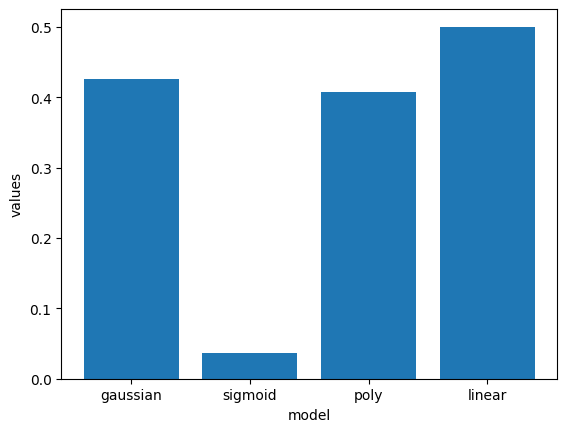

In [83]:
model = list(accuracy.keys())
values = list(accuracy.values())
plt.bar(model, values)
plt.xlabel('model')
plt.ylabel('values')
plt.show()

In [ ]:
# ===============================
# FINAL MODEL TRAINING (DEPLOYMENT)
# ===============================


In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv(r"C:\Users\Afshan\Downloads\cleaned_set")


In [3]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure',
        'SkinThickness', 'Insulin', 'BMI',
        'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [7]:
y_pred = rf_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=10,            # controls overfitting
    min_samples_split=5,     # minimum samples to split a node
    min_samples_leaf=2,      # minimum samples at leaf node
    random_state=42
)

# Train the model
rf_model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [9]:
import pickle

# Save trained Random Forest model
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully")


Model and scaler saved successfully
